dataset from the UCI Machine Learning Repository

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('../../data/bike/hour.csv')
print(data.shape)

(17379, 17)


now EDA

In [121]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [122]:
print("type of dataset::{}".format(data.dtypes))

type of dataset::instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [123]:
data.rename(columns={'instant':'rec_id',
                      'dteday':'datetime',
                      'holiday':'is_holiday',
                      'workingday':'is_workingday',
                      'weathersit':'weather_condition',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'total_count',
                      'hr':'hour',
                      'yr':'year'},inplace=True)

In [124]:
data.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


delete id time yearcolumns

In [125]:
data = data.drop(['rec_id','datetime','year'], axis=1)

In [126]:
data.head()

,season,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [127]:
data['season'] = data.season.astype('category')
data['month'] = data.month.astype('category')
data['hour'] = data.hour.astype('category')
data['is_holiday'] = data.is_holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['is_workingday'] = data.is_workingday.astype('category')
data['weather_condition'] = data.weather_condition.astype('category')

data.dtypes

season               category
month                category
hour                 category
is_holiday           category
weekday              category
is_workingday        category
weather_condition    category
temp                  float64
atemp                 float64
humidity              float64
windspeed             float64
casual                  int64
registered              int64
total_count             int64
dtype: object

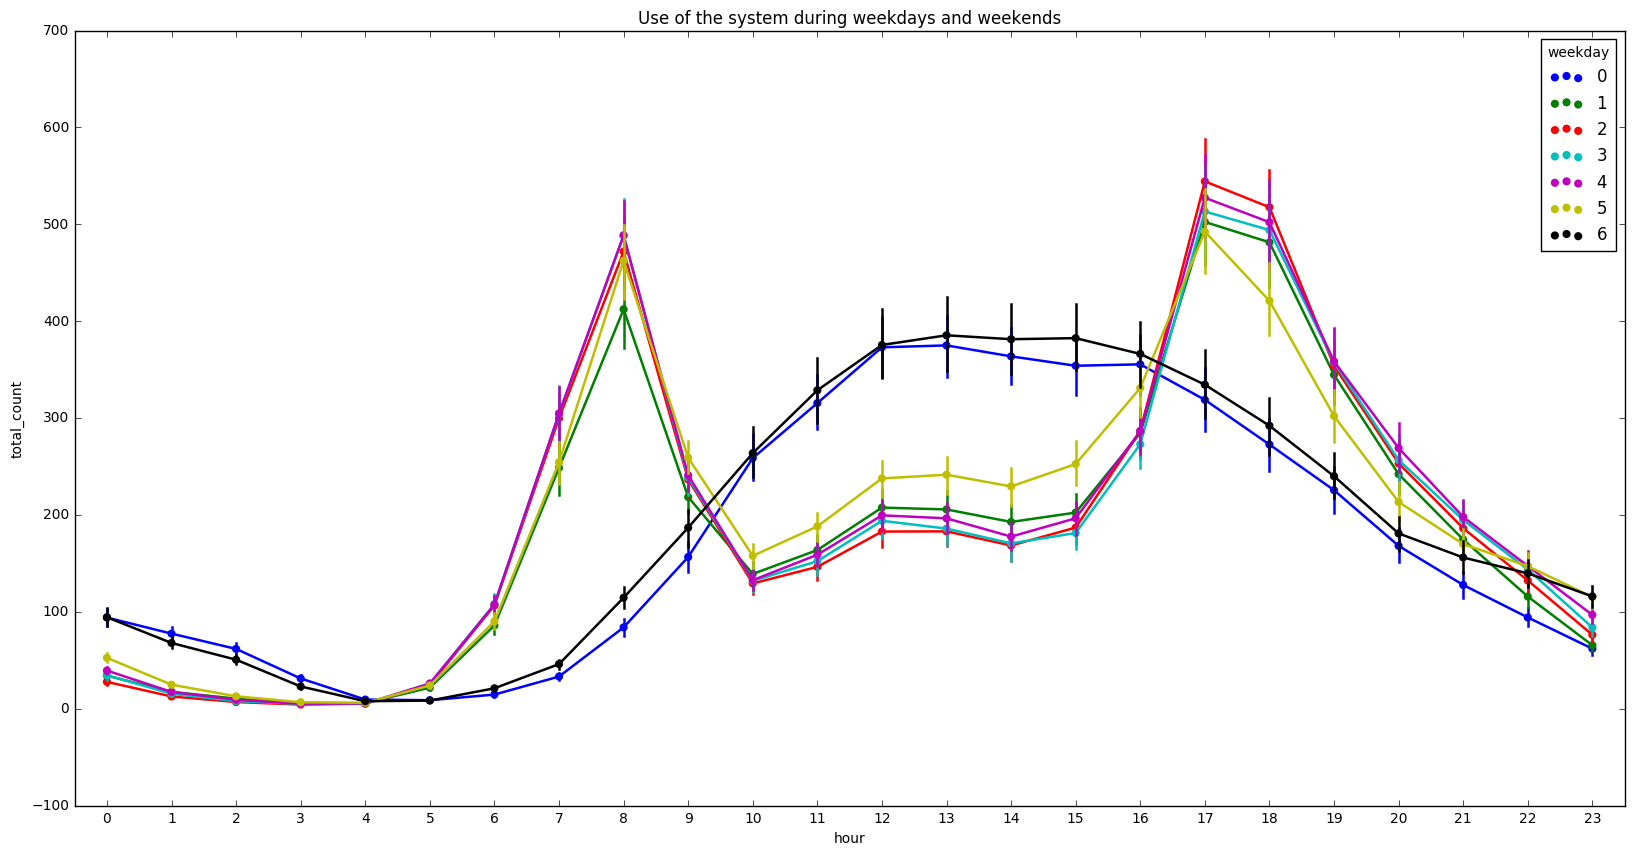

In [128]:
# Day-wise hourly data distribution
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data[['hour',
                       'total_count',
                       'weekday']],
            x='hour', y='total_count',
            hue='weekday', ax=ax)
ax.set(title="Use of the system during weekdays and weekends")

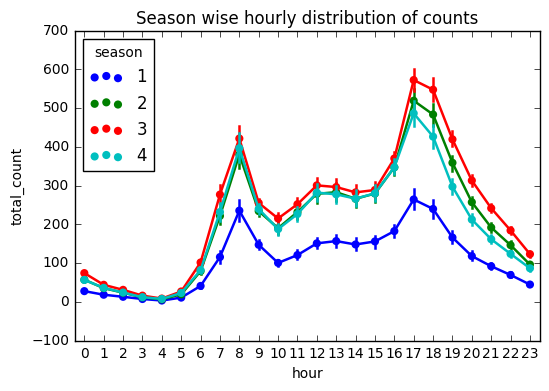

In [129]:
# Season-wise hourly data distribution
fig,ax = plt.subplots()
sns.pointplot(data=data[['hour',
                           'total_count',
                           'season']],
             x='hour',y='total_count',
             hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

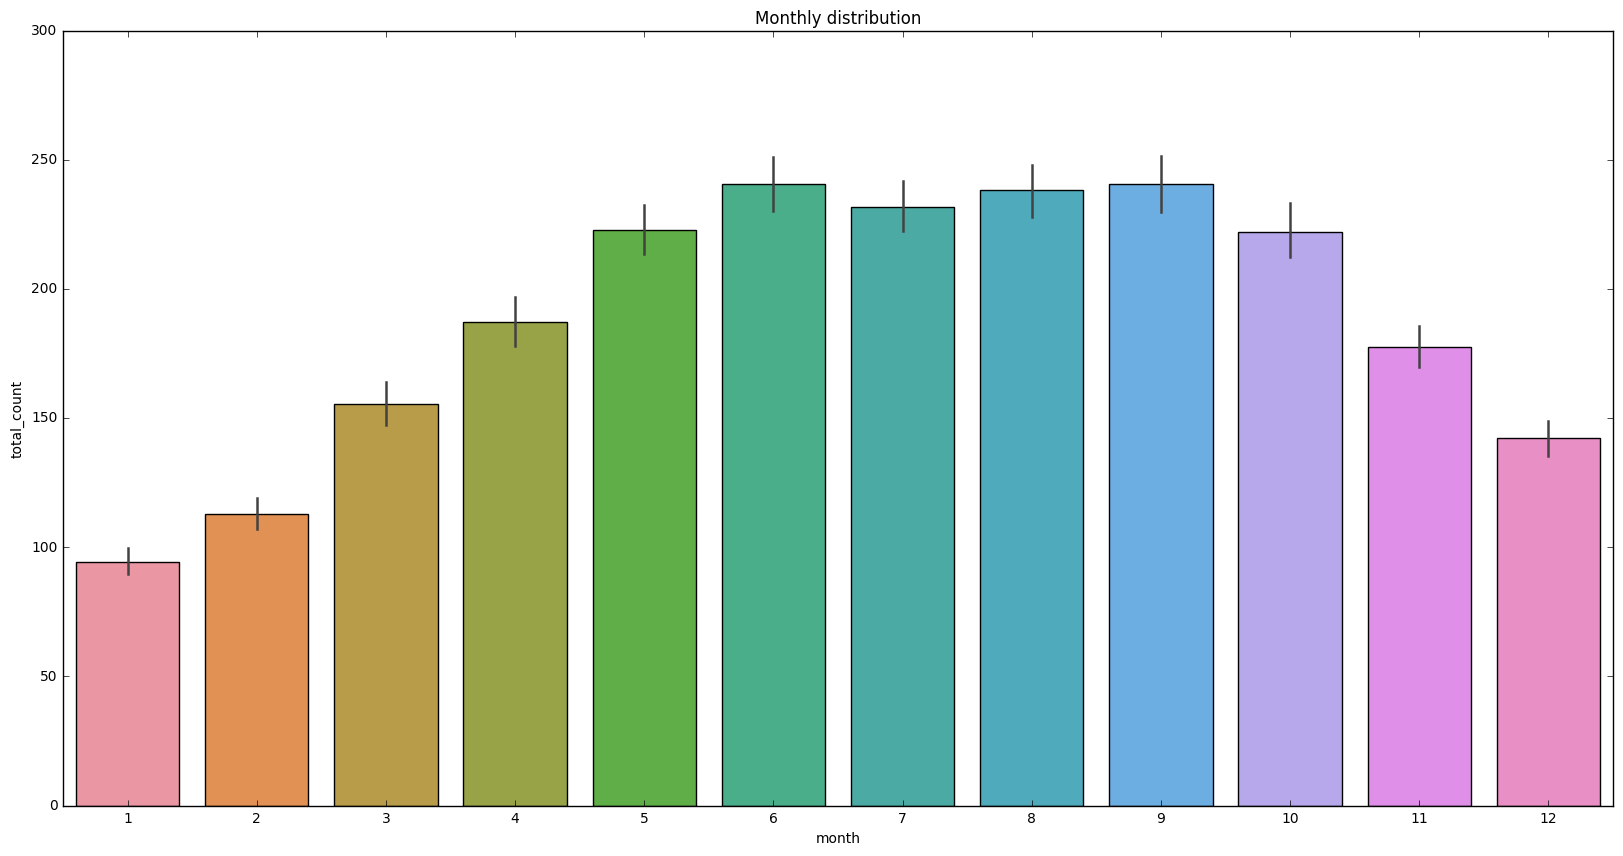

In [130]:
# monthly distribution
fig, ax = plt.subplots(figsize=(20,10))
sn.barplot(data=data[['month',
                      'total_count']],
            x='month', y='total_count')
ax.set(title="Monthly distribution")

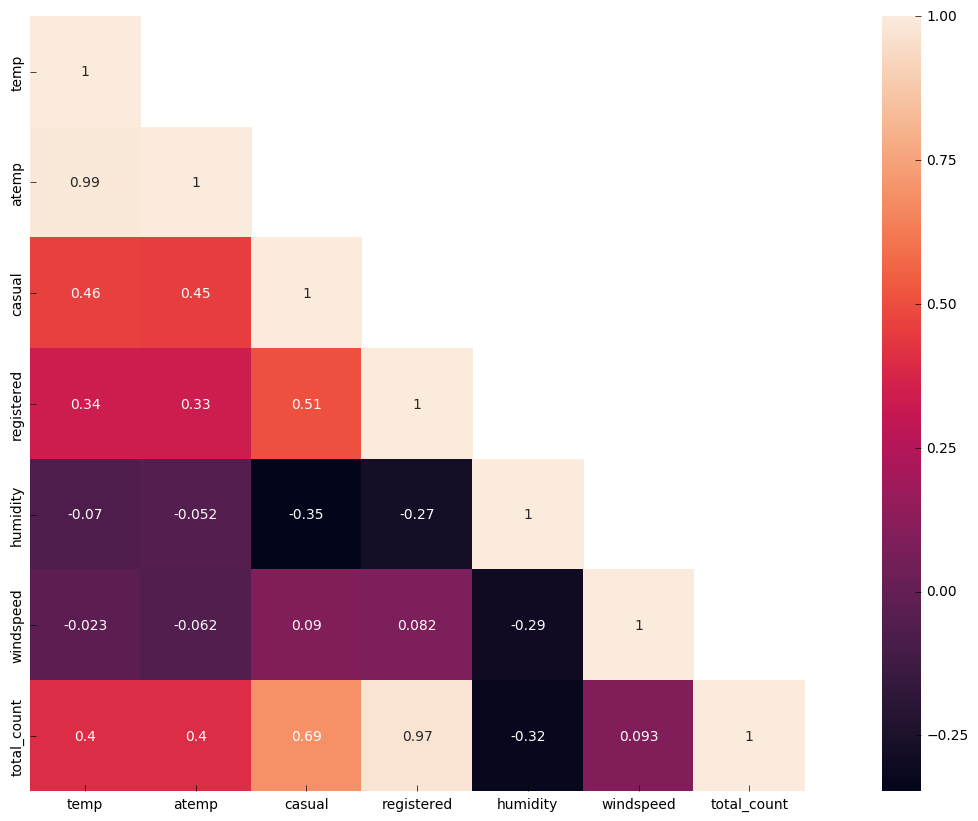

In [131]:
# Correlations
data_correlation = data[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'total_count']].corr()
mask = np.array(data_correlation)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,10))
sns.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)




In [132]:
data = data.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)

In [133]:
data.head()

,season,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,total_count
0,1,1,0,0,6,0,1,0.24,0.81,16
1,1,1,1,0,6,0,1,0.22,0.80,40
2,1,1,2,0,6,0,1,0.22,0.80,32
3,1,1,3,0,6,0,1,0.24,0.75,13
4,1,1,4,0,6,0,1,0.24,0.75,1


In [134]:
columns_to_dummify = ['season', 'month', 'hour', 'is_holiday', 'weekday', 'is_workingday', 'weather_condition']

In [135]:
data_dummify=pd.get_dummies(data, columns=columns_to_dummify)

In [136]:
data_dummify.head()

,temp,humidity,total_count,season_1,season_2,season_3,season_4,month_1,month_2,month_3,...,weekday_3,weekday_4,weekday_5,weekday_6,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4
0,0.24,0.81,16,1,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.80,40,1,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.80,32,1,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.75,13,1,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.75,1,1,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0


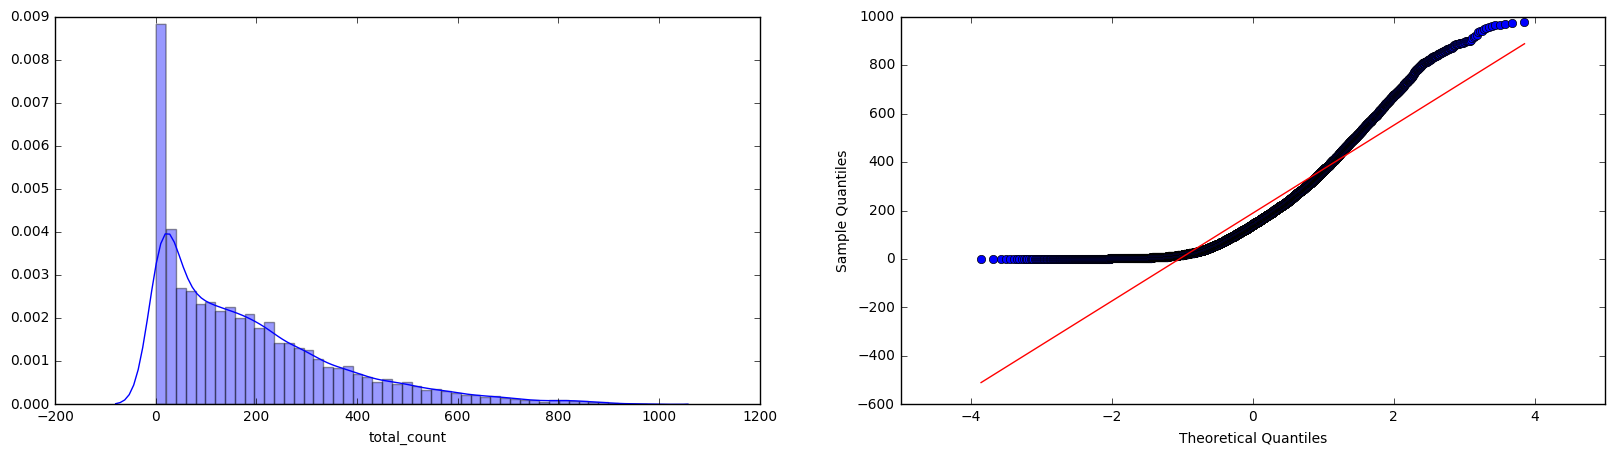

In [137]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sn.distplot(data['total_count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(data['total_count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

In [138]:
import math
data['total_count'] = data['total_count'].transform(lambda x: math.log(x))

In [139]:
data.head()

,season,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,humidity,total_count
0,1,1,0,0,6,0,1,0.24,0.81,2.772589
1,1,1,1,0,6,0,1,0.22,0.80,3.688879
2,1,1,2,0,6,0,1,0.22,0.80,3.465736
3,1,1,3,0,6,0,1,0.24,0.75,2.564949
4,1,1,4,0,6,0,1,0.24,0.75,0.000000


In [140]:
# Modelling
from sklearn.model_selection import train_test_split

y = data_dummify['total_count']
X = data_dummify.drop(['total_count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.33,
                                                   random_state=42)

In [141]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

models = [LinearRegression(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(predicted.mean())
    
for model in models:
    test_algorithms(model)

-12318.185221943724
-12313.936938893161
-12671.950507643694
-13911.641288266994
-10354.02480165168
-6358.143798980544
-8609.618851918702
-6245.293681644452
-6240.8805694301045


In [142]:
X_train.head()

,temp,humidity,season_1,season_2,season_3,season_4,month_1,month_2,month_3,month_4,...,weekday_3,weekday_4,weekday_5,weekday_6,is_workingday_0,is_workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,weather_condition_4
5749,0.64,0.65,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
1843,0.50,0.45,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
13855,0.86,0.47,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9723,0.30,0.61,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
10981,0.54,0.19,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0


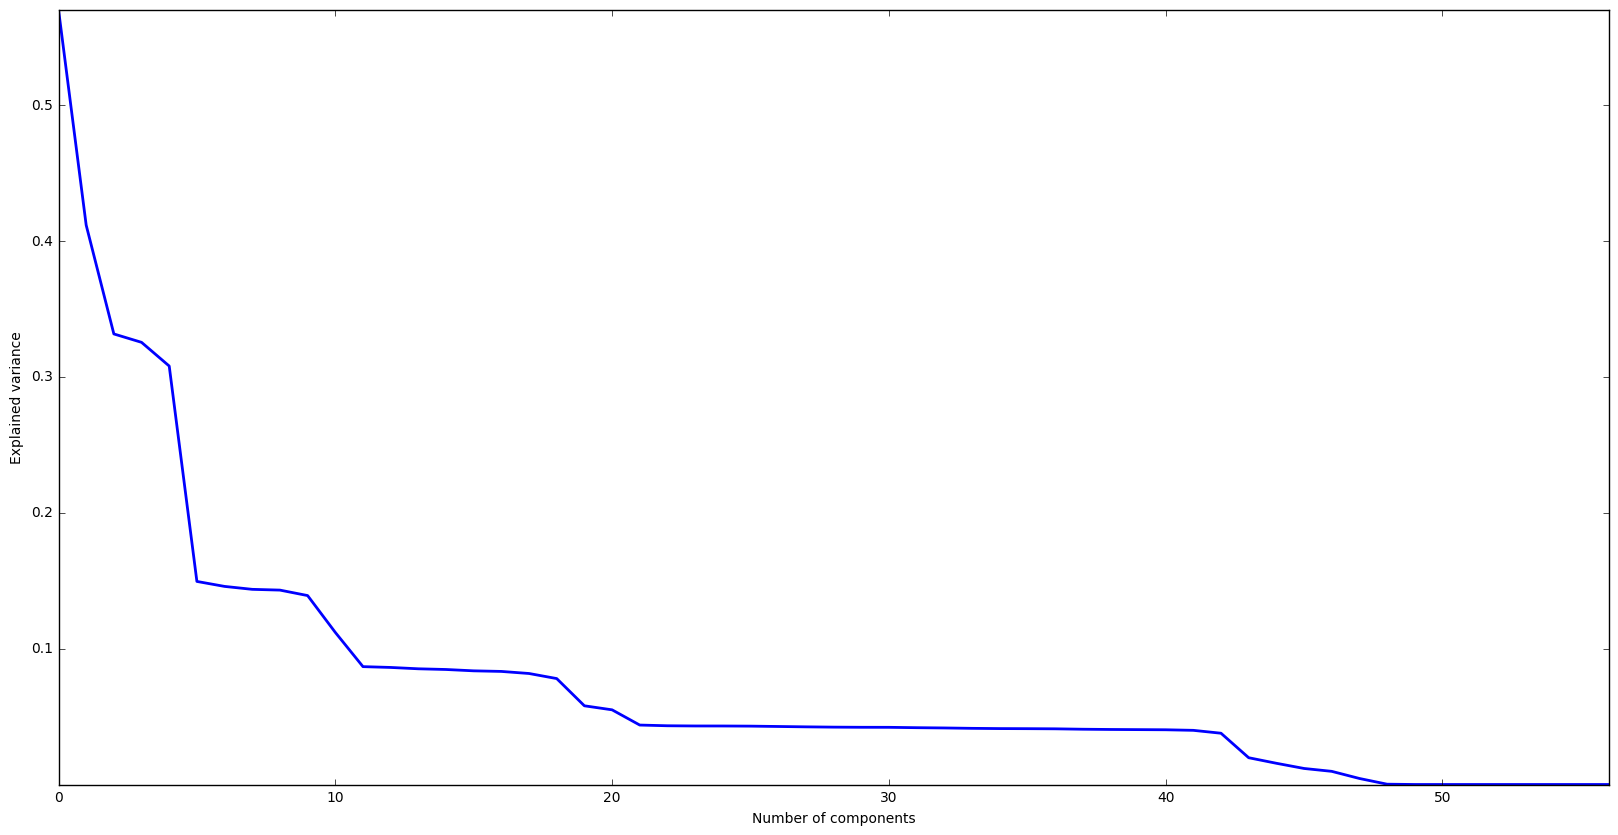

In [154]:
from sklearn import decomposition

# Plot PCA spectrum
pca = decomposition.PCA()
pca.fit(X_train)

plt.figure(1, figsize=(20, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [155]:
from sklearn.pipeline import Pipeline

etr = ExtraTreesRegressor()

pipeline = Pipeline(steps=[('pca', pca), 
                           ('etr', etr)])

from sklearn.model_selection import GridSearchCV

print(pipeline.get_params())

{'etr__bootstrap': False, 'etr__min_impurity_split': None, 'etr__max_depth': None, 'etr': ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False), 'etr__criterion': 'mse', 'pca__n_components': None, 'pca__copy': True, 'pca__svd_solver': 'auto', 'pca__random_state': None, 'etr__min_impurity_decrease': 0.0, 'pca': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'etr__oob_score': False, 'memory': None, 'pca__iterated_power': 'auto', 'etr__n_estimators': 10, 'etr__verbose': 0, 'steps': [('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whit

In [158]:

hyperparameters= {'etr__n_estimators' : [10,100,500],
                   'etr__max_depth' : [None, 20, 50],
                   'pca__n_components' : [9,19,39]}

clf = GridSearchCV(pipeline,
                   hyperparameters,
                   cv=10)

clf.fit(X_train, y_train)

# Best params
print(clf.best_params_)

KeyboardInterrupt: 

In [159]:
pca.explained_variance_

array([5.70488839e-01, 4.11770915e-01, 3.31662626e-01, 3.25481469e-01,
       3.08033028e-01, 1.49481105e-01, 1.45817268e-01, 1.43660491e-01,
       1.43097201e-01, 1.39076696e-01, 1.11973284e-01, 8.67630917e-02,
       8.61654381e-02, 8.51716283e-02, 8.46612660e-02, 8.36715489e-02,
       8.32372813e-02, 8.17108232e-02, 7.79774236e-02, 5.79301705e-02,
       5.49717109e-02, 4.37590164e-02, 4.32363031e-02, 4.30833356e-02,
       4.30662706e-02, 4.29660523e-02, 4.27037740e-02, 4.24392910e-02,
       4.22286764e-02, 4.21169489e-02, 4.20886263e-02, 4.18220780e-02,
       4.16248699e-02, 4.13394883e-02, 4.11611086e-02, 4.10948866e-02,
       4.09881449e-02, 4.06852656e-02, 4.05078621e-02, 4.03950903e-02,
       4.02853389e-02, 3.98700615e-02, 3.77434307e-02, 1.97124199e-02,
       1.56255482e-02, 1.18024780e-02, 9.68641357e-03, 4.43753630e-03,
       2.27721153e-04, 1.12509085e-31, 1.68394064e-32, 1.66784845e-32,
       1.33516799e-32, 1.31629776e-32, 7.83165212e-33, 4.99254599e-33,
      